# EXPLORATION 01. 인공지능과 가위바위보 하기

### **1. 폴더 생성 및 압축 풀기**

In [2]:
# 폴더 생성하기

! mkdir rock_scissor_paper
! mkdir rock_scissor_paper/scissor
! mkdir rock_scissor_paper/rock
! mkdir rock_scissor_paper/paper

! ls -l rock_scissor_paper/

total 12
drwxr-xr-x 2 root root 4096 Jan 11 08:24 paper
drwxr-xr-x 2 root root 4096 Jan 11 08:24 rock
drwxr-xr-x 2 root root 4096 Jan 11 08:24 scissor


In [17]:
# .zip 파일 압축 풀기

!unzip -uq "/content/rock_scissor_paper/paper/paper.zip" -d "/content/rock_scissor_paper/paper"
!unzip -uq "/content/rock_scissor_paper/rock/rock.zip" -d "/content/rock_scissor_paper/rock"
!unzip -uq "/content/rock_scissor_paper/scissor/scissor.zip" -d "/content/rock_scissor_paper/scissor"

# l압축 해제 명령어 : unzip <파일명>.zip

### **2. 데이터 준비하기**

In [58]:
#시작 전 import 하기

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# 가위 사진 리사이즈하기
from PIL import Image
import glob

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = '/content/rock_scissor_paper/scissor'
resize_images(image_dir_path)

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 모든 파일 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")    #개수도 표시하기

print("가위 이미지 resize 완료!")

181  images to be resized.
181  images resized.
가위 이미지 resize 완료!


In [60]:
# 바위 사진 리사이즈하기

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = '/content/rock_scissor_paper/rock'
resize_images(image_dir_path)

def resize_image(image_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

# 모든 파일 28x28 사이즈로 바꾸어 저장
    target_size(28, 28)
    for img in image:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")    #개수도 표시하기
    
print("바위 이미지 resize 완료!")

154  images to be resized.
154  images resized.
바위 이미지 resize 완료!


In [61]:
# 보자기 사진 리사이즈하기

# 보자기 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = '/content/rock_scissor_paper/paper'
resize_images(image_dir_path)

def resize_image(image_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
# 모든 파일 28x28 사이즈로 바꾸어 저장
    target_size(28, 28)
    for img in image:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")    #개수도 표시하기
    
print("보 이미지 resize 완료!")

180  images to be resized.
180  images resized.
보 이미지 resize 완료!


In [67]:
# 학습 시키기
# 가위는 0, 바위는 1, 보는 2로 정답지를 낼 수 있게 설정할 것이다.
import numpy as np

def load_data(img_path, number_of_data=515):  #직접 촬영한 가위바위보 사진들의 총개수는 515장이다.
    img_size=28
    color=3    #흑백은 1, 컬러는 3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/300.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 515 입니다.
x_train shape: (515, 28, 28, 3)
y_train shape: (515,)


`load_data()` 함수는 입력으로 이미지가 있는 폴더 위치를 받음.
이때 3개의 클래스가 가위: 0, 바위: 1, 보: 2 로 라벨링 됨.

라벨:  0


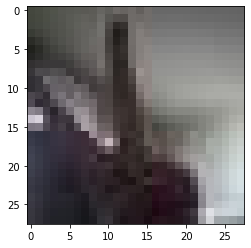

In [68]:
#이미지 불러와서 확인하기
plt.imshow(x_train[0])    #문제지
print('라벨: ', y_train[0])    #정답지, 정답을 보면 가위가 0에 잘 매치되어있음을 볼 수 있다.

### **3. 딥러닝 네트워크 설계하기**

In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random 

n_channel_1=25    #얼마나 다양한 이미지의 특징을 살펴볼 것인지에 대해 설정 해주는 것
n_channel_2=40    ##얼마나 다양한 이미지의 특징을 살펴볼 것인지에 대해 설정 해주는 것
n_dense=32    #알고리즘의 복잡도를 나타낸다. 숫자가 높을수록 복잡도 up
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))    #컬러 사진이므로 3을 넣어준다.
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 25)        700       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 40)        9040      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 40)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 32)               

### **4. 딥러닝 네크워크 학습시키기**

In [70]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동 계산 됨.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (515, 28, 28, 3)
After Reshape - x_train_reshaped shape: (515, 28, 28, 3)


In [71]:
#x_train으로 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
17/17 [==============================] - 1s 26ms/step - loss: 1.7613 - accuracy: 0.2951
Epoch 2/10
17/17 [==============================] - 0s 25ms/step - loss: 0.6746 - accuracy: 0.8583
Epoch 3/10
17/17 [==============================] - 0s 26ms/step - loss: 0.2582 - accuracy: 0.9262
Epoch 4/10
17/17 [==============================] - 0s 25ms/step - loss: 0.1810 - accuracy: 0.9340
Epoch 5/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0678 - accuracy: 0.9864
Epoch 6/10
17/17 [==============================] - 0s 26ms/step - loss: 0.0685 - accuracy: 0.9845
Epoch 7/10
17/17 [==============================] - 0s 24ms/step - loss: 0.0298 - accuracy: 0.9942
Epoch 8/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0198 - accuracy: 0.9981
Epoch 9/10
17/17 [==============================] - 0s 24ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 10/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0087 - accuracy: 0.9981


### **5. 얼마나 잘 만들었는지 확인하기!**

In [40]:
#테스트 이미지 파일을 위해 폴더 생성
!mkdir rock_scissor_paper/test
!mkdir rock_scissor_paper/test/paper_test
!mkdir rock_scissor_paper/test/rock_test
!mkdir rock_scissor_paper/test/scissor_test

In [41]:
#테스트 파일 압축풀기
!unzip -uq "/content/rock_scissor_paper/test/paper_test/paper_test.zip" -d "/content/rock_scissor_paper/test/paper_test"
!unzip -uq "/content/rock_scissor_paper/test/rock_test/rock_test.zip" -d "/content/rock_scissor_paper/test/rock_test"
!unzip -uq "/content/rock_scissor_paper/test/scissor_test/scissor_test.zip" -d "/content/rock_scissor_paper/test/scissor_test"

In [48]:
#테스트 이미지들도 똑같이 리사이즈 해주기
# 가위
image_dir_path = '/content/rock_scissor_paper/test/scissor_test'
resize_images(image_dir_path)

print("가위 test resize 완료!")

# 바위
image_dir_path = '/content/rock_scissor_paper/test/rock_test'
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 test resize 완료!")

# 보자기
image_dir_path = '/content/rock_scissor_paper/test/paper_test'
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 test resize 완료!")


def load_data(img_path, number_of_data=4747):  # 테스트 가위바위보 이미지 개수 총합 4747 기재
    img_size=28
    color=3    #컬러 이미지니 꼭 3으로!
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/rock_scissor_paper/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/300.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

1655  images to be resized.
1655  images resized.
가위 test resize 완료!
1503  images to be resized.
1503  images resized.
바위 test resize 완료!
1589  images to be resized.
1589  images resized.
보 test resize 완료!
테스트데이터(x_train)의 이미지 개수는 4747 입니다.
x_test shape: (4747, 28, 28, 3)
y_test shape: (4747,)


라벨:  0


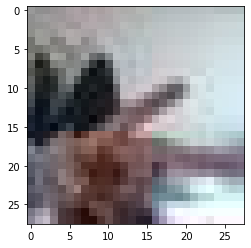

In [72]:
#테스트 이미지 확인해보기
import matplotlib.pyplot as plt
plt.imshow(x_test[500])    #문제지
print('라벨: ', y_test[500])    #정답지, 이미지를 보면 가위로 라벨 0으로 출력되었다.

In [73]:
#모델 정확도 측정하기
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

149/149 - 1s - loss: 3.5023 - accuracy: 0.3097 - 1s/epoch - 9ms/step
test_loss: 3.5023481845855713 
test_accuracy: 0.30966925621032715




---
# **회고**

1. colab에서 압축풀기

`!unzip -uq "zip 파일 경로(확장자 포함)" -d "압축 푼 파일 저장할 경로"`

처음에는 lms 환경에서 했던 것처럼 압축을 풀려고 했으나 잘되지 않았다.
분명 파일 경로도 잘 설정하여 했음에도 되지 않아 colab에서 압축 푸는 방법을 찾아보니 위와 같은 코드 양식이 나왔는데 상당히 직관적이어서 쓰기 편하다는 생각을 했다.

 이후 왜 colab에서는 `cd ~ ` 가 되지 않았는지 찾아보니

` %cd drive/My\ Drive/example # %cd [프로젝트 위치]`
 이러한 양식으로 쓰인다는 것을 확인했다.

 같은 언어지만 환경에 따라 조금씩 달라지는게 아직까진 불편하고 낯설다.


 2. `load_data()` 함수

 해당 함수를 사용하면 '귤이 잘 익었는지 안 익었는지' 등을 알 수 있다고 해서 찾아보았는데 생각보다 개념이 깊은 것 같다.
 바로 개념에 대해 설명해주기보다는 전부 예제를 통해 보여주다보니 제대로 된 정보가 찾기 힘들다. 다만, 해당 사진 데이터를 다룰 때 해당 함수를 사용하면 머신러닝과 딥러닝에 상당히 유용할 것이라는 생각은 든다.
 영상에도 사용이 가능한지 의문이다. 아마 가능한 것 같다. 파이썬에 좀 더 익숙해지고 나서 다시 한 번 찾아보면 좋을 것 같다.

 3. 네트워크 설계

 네크워크 설계하는 부분은 반복해서 보고는 있지만 여전히 어려운 것 같다.
 특히 처음 이부분에서 오류가 나서 2~3일 동안 해결할 수가 없었는데 알고봤더니 광장히 간단한 문제였는데.. 컬러사진은 1이 아니라 3을 넣어줘야 한다는 사실이다.
 개념 공부할 때 충분히 이해하고 넘어갔었지만 막상 코드에서는 어디가 사진 컬러에 대한 정보가 들어가는지 몰랐으니 그럴 법도 하다.
 이 문제를 해결하고 나서는 다행히도 크게 오류나는 곳은 없었다.

4. 정확도에 대해서
 
테스트까지 진행 후 정확도를 살펴보면 대략 30% 정도 된다.

처음 학습시킨 데이터의 정확도는 98%로 높은 편인데, 테스트 진행 후 정확도를 살펴보니 다소 낮은 편이다. 여기에는 2가지 이유가 있다고 생각한다.

(1) 테스트 이미지 파일의 화질이 좋지 않다.
(2) 테스트 이미지 파일이 다양하지 않다.

테스트 이미지 파일의 화질이 좋지 않기 때문에 손모양과 배경이 뭉쳐 가위인지 바위인지 식별하기 어려웠을 것이라 생각한다. 더불어 테스트를 한 사람의 데이터로만 진행하였기 때문에 다양성이 떨어져 정확도에 영향을 미쳤을 것 같기도 하다.

 이를 해결하기 위해선 단조로운 배경에서 선명하게 찍은 테스트 파일들이 필요할 것이고, 최대한 다양한 사람들의 테스트파일을 사용해본다면 지금보다 훨씬 좋은 정확도를 얻을 수 있지 않을까 싶다.